# Task 1: Aruco Marker Detection

In this notebook, we will look into how we can load an image, preprocess it and then detect Aruco marker in that image.

## Setup

If you haven't installed OpenCV yet, you can just run the cell below to install it.

In [16]:
# install opencv
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


## Imports

In [17]:
# imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

import yaml
import io

## Load and Preprocess Image

We start by loading one of the images from recorded robot trajectory and diplaying it.

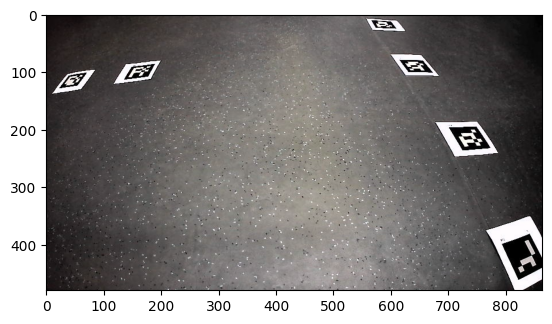

In [18]:
# load image
img = cv2.imread("./2024-09-12_17-29-34/img_674.jpg")
# show image
plt.imshow(img)

As you can see, the image is somewhat distorted. There is, for example, a very noticible fisheye effect on the image. Using the image like this would negatively impact our detection and later measurement, so we first want to get rid of this distortion. This is what *camera calibration* is needed for.  
Let's first load the intrinsic camera parameters from the *camera_intrinsics.yml* file:

In [19]:
# load camera parameters
with open("../camera_intrinsics.yml", 'r') as stream:
    camera_intrinsics = yaml.safe_load(stream)
camera_matrix = np.array(camera_intrinsics["camera_matrix"]["data"]).reshape((3,3))
distortion_coefficients = np.array(camera_intrinsics["distortion_coefficients"]["data"])

Now we can use the camera parameters to undistort the image. OpenCV already provides a function for ths (helpfully called *undistort*)  
**Task:** Use OpenCV's *undistort* function to undistort the image.

In [20]:
### Your code here ###
img_undistorted = cv2.undistort(img, camera_matrix, distortion_coefficients)
### 

When we now display the image again, we can see that the distortion that was very noticible in the image before applying the *undistort* function, is now gone.

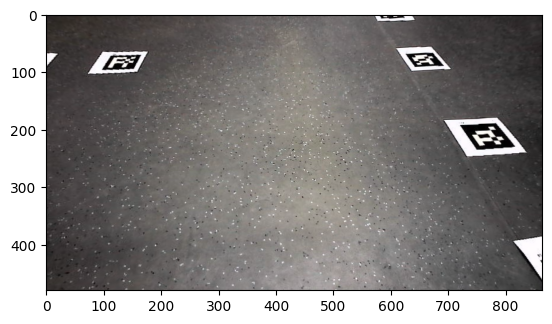

In [21]:
# show undistorted image
plt.imshow(img_undistorted)

## Detect Aruco Markers

Now that we have undistorted the image, we can start detecting the Aruco markers. This is a fundamental task for the project, since we will use markers as the main features that define our world! OpenCV already provides us with a function that can detect the markers in the image. After doing that we can draw thm onto the image to see, what the algorithm has detected.  

**Task:** Detect the Aruco markers in the image using the *cv2.aruco.ArucoDetector* function with the *cv2.aruco.DICT_ARUCO_ORIGINAL* marker dict.

In [22]:
### Your code here ###
# setup detector
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL)
arucoParams = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(arucoDict, arucoParams)
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(img_undistorted)

**Task:** Draw the outlines of the detected markers onto the image using the *cv2.aruco.drawDetectedMarkers* function.

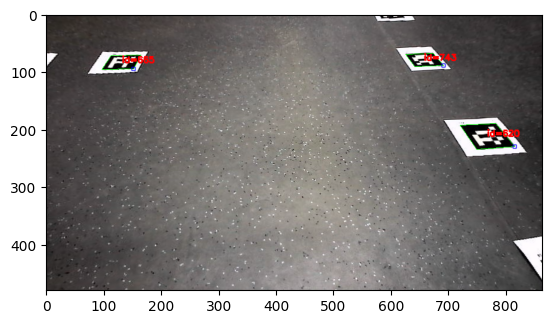

In [23]:
cv2.aruco.drawDetectedMarkers(img_undistorted, markerCorners, markerIds)
plt.imshow(img_undistorted)